In [ ]:
https://plot.ly/python/choropleth-maps/https://archive.org/details/stackexchange

In [134]:
import numpy as np
import pandas as pd
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import os
from lxml import etree as et
import glob
import pickle
% matplotlib inline

In [154]:
plt.rcParams['figure.figsize'] = [8, 4]

In [ ]:
# data loading

In [137]:
names = {'posthistory' : ['Id', 'PostHistoryTypeId', 'PostId', 'RevisionGUID', 'CreationDate', 'UserId', 'UserDisplayName', 
                          'Comment', 'Text', 'CloseReasonId'], 
         'tags' : ['Id', 'TagName', 'Count', 'ExcerptPostId', 'WikiPostId']}

In [138]:
for stack in glob.glob("*.com"):
    stack_name = stack[:stack.find('.')]
    for xml in glob.glob(os.path.join(stack, "*.xml")):
        xml_name = xml[xml.find('.com') + 5:xml.find('.xml')].lower()
        
        if not os.path.exists(r'csv'):
            os.makedirs(r'csv')
        
        if xml_name == 'posthistory' or xml_name == 'tags':
            print(stack_name[0] + '_' + xml_name)

            col_names = names.get(xml_name)
            tree = et.parse(xml)
            root = tree.getroot()
            df = pd.DataFrame([[r.get(i) for i in col_names] for r in root], columns = col_names)

            df.to_csv(r'csv\\' + stack_name[0] + '_' + xml_name + '.csv', index = False)         

e_posthistory
e_tags
m_posthistory
m_tags
p_posthistory
p_tags


In [ ]:
# tags word cloud

In [140]:
tags_paths = [r'csv\e_tags.csv', r'csv\m_tags.csv', r'csv\p_tags.csv']

In [143]:
if not os.path.exists(r'tags_word_cloud_data'):
    os.makedirs(r'tags_word_cloud_data')
    
for path in tags_paths:
    df = pd.read_csv(path)
    df = df.loc[:,['TagName', 'Count']]
    
    tmp = path.split('_')[0]
    l = tmp[-1]
    df.to_csv(r'tags_word_cloud_data\\' + l + '_' + 'tags.csv', index = False)    

In [144]:
tags_to_use_paths = [r'tags_word_cloud_data\e_tags.csv', r'tags_word_cloud_data\m_tags.csv', r'tags_word_cloud_data\p_tags.csv']

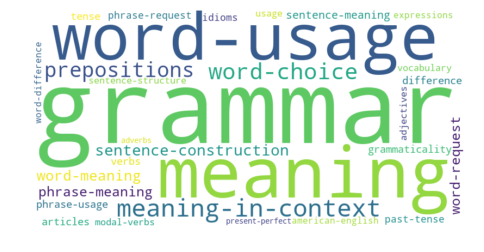

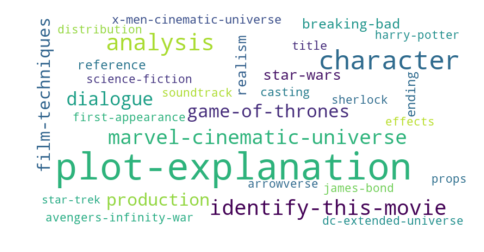

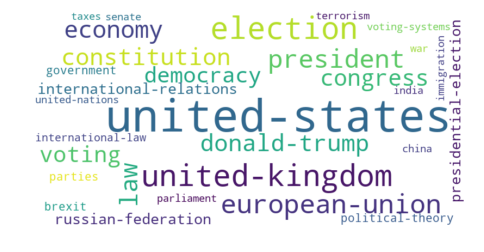

In [176]:
n = 30

if not os.path.exists(r'tags_word_cloud'):
    os.makedirs(r'tags_word_cloud')

for path in tags_to_use_paths:
    df = pd.read_csv(path)
    df = df.loc[:,['TagName', 'Count']]
    tag_dict = dict(zip(df['TagName'], df['Count']))
    
    tmp = path.replace('tags_word_cloud_data', '').split('_')[0]
    l = tmp[-1]
    
    wordcloud = WordCloud(background_color='white', max_words = n, width = 800, height = 400,
                         relative_scaling = 0.4).generate_from_frequencies(tag_dict)
    wordcloud.to_file(r'tags_word_cloud\\' + l + '_tags.png')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [189]:
# posts word cloud

In [237]:
if not os.path.exists(r'posts_word_cloud_data'):
    os.makedirs(r'posts_word_cloud_data')

def save_dict(obj, name ):
    with open(r'posts_word_cloud_data/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_dict(path):
    with open(path, 'rb') as f:
        return pickle.load(f)

In [243]:
def text_to_word_colud_dict(path):
    df = pd.read_csv(path)
    df = df.loc[:,['Id','Text']]
    l1 = df.shape[0]
    
    df = df.loc[:,['Id','Text']]
    df["Text_new"] = df["Text"].apply(lambda x: re.sub(r'(?<=<)(.*)(?=>)', '', str(x)).replace('<>', ''))
    df["Text_new"] = df["Text_new"].apply(lambda x: re.sub(r'(?<={")(.*)(?=}]})', '', str(x)).replace('"{""}]}"', ''))
    df["Text_new"] = df["Text_new"].apply(lambda x: re.sub(r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)', 
                                                           '', str(x)).replace('()', ''))
    
    df["Text_new"] = df["Text_new"].apply(lambda x: re.sub(r"\s+", " ", str(x)))
    df = df[df.Text_new != '']
    df = df[df.Text_new != 'nan']
    df = df.reset_index(drop = True)
    df = df.Text_new

    l2 = len(df)
    
    if not os.path.exists(r'posts_word_cloud_data'):
        os.makedirs(r'posts_word_cloud_data')
    
    name = path.split('_')[0]
    df.to_csv(r'posts_word_cloud_data\\' + name[-1] + '_posts_text.csv', index = False)
    print(name[-1] + ': ' + str(l2/l1))
    
    text = " ".join(row for row in df)
    cloud_dict = WordCloud().process_text(text)
    save_dict(cloud_dict, name[-1] + '_cloud_dict')

In [229]:
posts_paths = [r'csv\e_posthistory.csv', r'csv\m_posthistory.csv', r'csv\p_posthistory.csv']

In [230]:
for path in paths: text_to_word_colud_dict(path)

e: 0.00021705486930041046
p: 0.0012700347989534912
m: 0.0005557099194220616


In [242]:
n = 30

In [238]:
def create_posts_word_cloud():
    for dic in glob.glob(os.path.join('posts_word_cloud_data', "*.pkl")):
        tmp = dic.replace('posts_word_cloud_data', '').split('_')[0]
        l = tmp[-1]
        
        posts_dict = load_dict(dic)
        wordcloud = WordCloud(background_color='white', max_words = n, width = 800, height = 400,
                              relative_scaling = 0.4).generate_from_frequencies(posts_dict)
        wordcloud.to_file(r'posts_word_cloud\\' + l + '_posts.png')
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

In [240]:
if not os.path.exists(r'posts_word_cloud'):
    os.makedirs(r'posts_word_cloud')

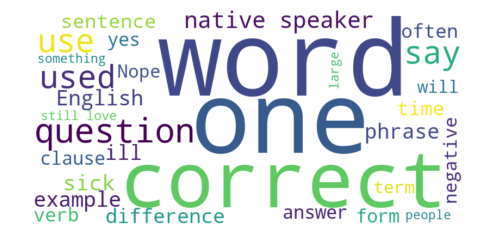

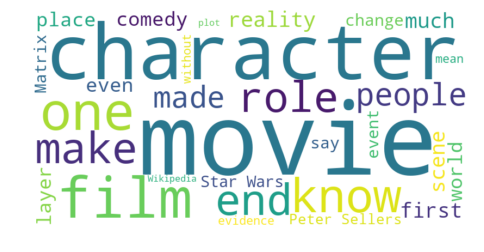

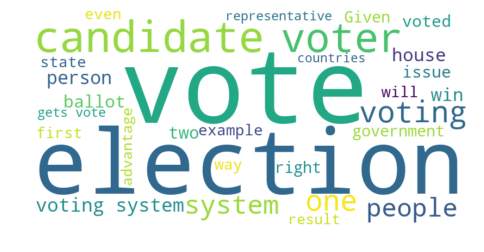

In [241]:
create_posts_word_cloud()

In [249]:
d = load_dict('posts_word_cloud_data\\e_cloud_dict.pkl')

In [265]:
s = pd.Series(d, name='freq')
s.index.name = 'word'
df = s.reset_index()

In [271]:
df = df.sort_values(by = ['freq'], ascending = False).reset_index(drop = True)